# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [144]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from zipfile import ZipFile
import re

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp= pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# because the data is a number and has decimals.
temp.Temperature.dtypes

dtype('float64')

#### Select the rows where state is New York

In [5]:
temp.loc[(temp['State'] == 'New York')]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
temp.loc[(temp['State'] == 'New York')].Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
temp.loc[(temp["Temperature"])> 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
temp['City'].loc[(temp["Temperature"])> 15]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [37]:
cond = temp["Temperature"]> 15 
cond1= temp["Temperature"]<20 
city= temp['City'].where(cond &cond1 == True).dropna()
print(city)

0         NYC
3    Hartford
Name: City, dtype: object


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [36]:
print(f'Standard deviation:\n\n\t{temp["Temperature"].groupby(temp["State"]).mean()}\n\n\n')
print(f'Standard deviation:\n\n\t{temp["Temperature"].groupby(temp["State"]).std()}')


Standard deviation:

	State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64



Standard deviation:

	State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [39]:
employee= pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [40]:
# can see different staff members with their details like dept, education level, job title, time in the company, salary and gender
print (employee)

     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

'IT is the most common staff; 1 of the staff has a Phd out of 8 total; gender-wise, are more or less equal (just 1 man more than woman),\nthe most common title job is analyst followed by associate which most of them has at least a year of experience inside de company\nand salary wages goes from 30 to 70'

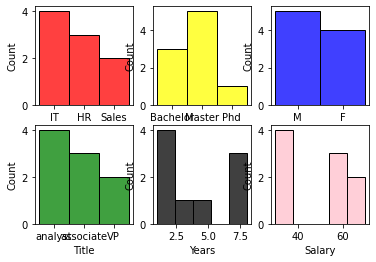

In [98]:
fig, axs = plt.subplots(nrows=2, ncols=3)
sns.histplot(x=employee.Department,color= 'red',ax=axs[0,0])
sns.histplot(x=employee.Education,color= 'yellow',ax=axs[0,1])
sns.histplot(x=employee.Gender,color= 'blue',ax=axs[0,2])
sns.histplot(x=employee.Title,color= 'green',ax=axs[1,0])
sns.histplot(x=employee.Years,color= 'black',ax=axs[1,1])
sns.histplot(x=employee.Salary,color= 'pink',ax=axs[1,2]);
"""IT is the most common staff; 1 of the staff has a Phd out of 8 total; gender-wise, are more or less equal (just 1 man more than woman),
the most common title job is analyst followed by associate which most of them has at least a year of experience inside de company
and salary wages goes from 30 to 70"""

#### What's the average salary in this company?

In [41]:
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [42]:
employee.Salary.max()

70

#### What's the lowest salary?

In [43]:
employee.Salary.min()


30

#### Who are the employees with the lowest salary?

In [44]:
employee['Name'].loc[(employee["Salary"])==30]

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [45]:
employee.loc[(employee["Name"])=='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [46]:
employee['Salary'].loc[(employee["Name"])=='David']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [47]:
employee.loc[(employee["Title"])=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [48]:
employee.iloc[:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [49]:
employee.iloc[:-5]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35


#### Find the employees who's title is associate and the salary above 55?

In [52]:
cond= employee['Title']=='associate'
cond1= employee['Salary']>55
empl= employee['Name'].where(cond &cond1 == True).dropna()
empl

7    Pedro
Name: Name, dtype: object

#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [62]:
group= employee.groupby(employee['Years'])
group.Salary.mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [64]:
group= employee.groupby(employee['Title'])
group.Salary.mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

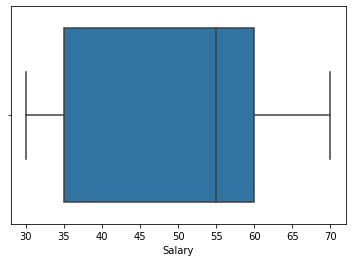

In [97]:
# draw boxplot here
employee
sns.boxplot(x="Salary", data=employee);

In [100]:
# print first quartile here
employee.Salary.quantile(0.25)

35.0

In [101]:
# print third quartile here
employee.Salary.quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [68]:
# your answer here
group = employee.groupby(employee['Gender'])
group.Salary.mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [73]:
print (f' The avg. age is {employee.Years.mean()}\n')
print (f' The min. age is {employee.Years.min()}\n')
print (f' The max. age is {employee.Years.max()}\n')
print (f' The avg. Salary is {employee.Salary.mean()}\n')
print (f' The min. Salary is {employee.Salary.min()}\n')
print (f' The max. Salary is {employee.Salary.max()}\n')

 The avg. age is 4.111111111111111

 The min. age is 1

 The max. age is 8

 The avg. Salary is 48.888888888888886

 The min. Salary is 30

 The max. Salary is 70



### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [104]:
with ZipFile("Orders.zip", 'r') as zObject:
    zObject.extractall(
        path="")

In [105]:
orders= pd.read_csv('orders.csv')

In [106]:
orders.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'year', 'month', 'day', 'hour',
       'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'amount_spent'],
      dtype='object')

In [107]:
orders.sample()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
365707,495120,578290,23473,2011,11,3,14,woodland small red felt heart,12,2011-11-23 14:07:00,0.83,13644,United Kingdom,9.96


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [108]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [111]:
orders.dtypes


Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

####  What is the average Purchase Price?

In [113]:
print(f'The avg. prucharse prices is {orders.amount_spent.mean()}')

The avg. prucharse prices is 22.394748504739596


#### What were the highest and lowest purchase prices? 

In [114]:
print(f'The max. prucharse prices is {orders.amount_spent.max()}')

The max. prucharse prices is 168469.6


In [115]:
print(f'The min. prucharse prices is {orders.amount_spent.min()}')

The min. prucharse prices is 0.0


#### Select all the customers we have in Spain

In [174]:
spain=orders.loc[(orders["Country"])=='Spain']
spain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [175]:
len(spain)

2485

#### Select all the customers who have bought more than 50 items ?

In [176]:
more_50_items= orders.loc[(orders["Quantity"])>50]
more_50_items

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
397721,541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
397729,541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
397761,541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


#### Select orders from Spain that are above 50 items

In [177]:
more_50 =(orders["Quantity"])>50
sp= (orders["Country"])=='Spain'
spain_more_50_spa= orders['Country'].where(more_50 & sp).dropna()
spain_more_50_spa


4250      Spain
4251      Spain
4252      Spain
4253      Spain
4254      Spain
32454     Spain
32455     Spain
32456     Spain
32457     Spain
91155     Spain
91156     Spain
91159     Spain
174442    Spain
174443    Spain
174444    Spain
174445    Spain
174446    Spain
174447    Spain
174448    Spain
174449    Spain
197167    Spain
197168    Spain
197169    Spain
197170    Spain
197171    Spain
224881    Spain
254097    Spain
289129    Spain
289134    Spain
289142    Spain
289143    Spain
295956    Spain
312655    Spain
312656    Spain
312657    Spain
366326    Spain
366327    Spain
366328    Spain
366329    Spain
Name: Country, dtype: object

#### Select all free orders

In [178]:
free= orders.where(orders.amount_spent== 0 )
free.dropna()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302.0,537197.0,22841,2010.0,12.0,7.0,14.0,round cake tin vintage green,1.0,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0
22539,33576.0,539263.0,22580,2010.0,12.0,4.0,14.0,advent calendar gingham sack,4.0,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0
25379,40089.0,539722.0,22423,2010.0,12.0,2.0,13.0,regency cakestand 3 tier,10.0,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0
29080,47068.0,540372.0,22090,2011.0,1.0,4.0,16.0,paper bunting retrospot,24.0,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
29082,47070.0,540372.0,22553,2011.0,1.0,4.0,16.0,plasters in tin skulls,24.0,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
34494,56674.0,541109.0,22168,2011.0,1.0,4.0,15.0,organiser wood antique white,1.0,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0.0
53788,86789.0,543599.0,84535B,2011.0,2.0,4.0,13.0,fairy cakes notebook a6 size,16.0,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0.0
85671,130188.0,547417.0,22062,2011.0,3.0,3.0,10.0,ceramic bowl with love heart design,36.0,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0.0
92875,139453.0,548318.0,22055,2011.0,3.0,3.0,12.0,mini cake stand hanging strawbery,5.0,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0.0
97430,145208.0,548871.0,22162,2011.0,4.0,1.0,14.0,heart garland rustic padded,2.0,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [179]:
lunch=orders.loc[orders['Description'].str.contains('lunch bag')]
lunch

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [180]:
lnch= orders['Description'].str.contains('lunch bag')
y_2011= orders['year']==2011
in_2011_lunch_bag=orders.where(y_2011 & lnch)
in_2011_lunch_bag.dropna()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678.0,540015.0,20725,2011.0,1.0,2.0,11.0,lunch bag red retrospot,10.0,2011-01-04 11:40:00,1.65,13319.0,United Kingdom,16.50
26341,42679.0,540015.0,20726,2011.0,1.0,2.0,11.0,lunch bag woodland,10.0,2011-01-04 11:40:00,1.65,13319.0,United Kingdom,16.50
26512,42851.0,540023.0,22382,2011.0,1.0,2.0,12.0,lunch bag spaceboy design,2.0,2011-01-04 12:58:00,1.65,15039.0,United Kingdom,3.30
26513,42852.0,540023.0,20726,2011.0,1.0,2.0,12.0,lunch bag woodland,1.0,2011-01-04 12:58:00,1.65,15039.0,United Kingdom,1.65
26860,43616.0,540098.0,22384,2011.0,1.0,2.0,15.0,lunch bag pink polkadot,1.0,2011-01-04 15:50:00,1.65,16241.0,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436.0,581486.0,23207,2011.0,12.0,5.0,9.0,lunch bag alphabet design,10.0,2011-12-09 09:38:00,1.65,17001.0,United Kingdom,16.50
397713,541695.0,581538.0,20727,2011.0,12.0,5.0,11.0,lunch bag black skull.,1.0,2011-12-09 11:34:00,1.65,14446.0,United Kingdom,1.65
397714,541696.0,581538.0,20725,2011.0,12.0,5.0,11.0,lunch bag red retrospot,1.0,2011-12-09 11:34:00,1.65,14446.0,United Kingdom,1.65
397877,541862.0,581581.0,23681,2011.0,12.0,5.0,12.0,lunch bag red vintage doily,10.0,2011-12-09 12:20:00,1.65,17581.0,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

In [190]:
spain.amount_spent.max()

1350.0

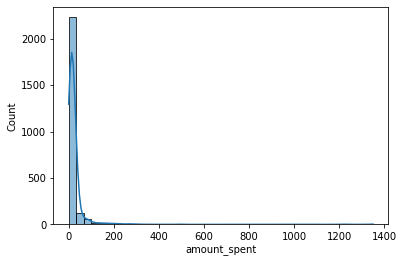

In [191]:
sns.histplot(x=spain.amount_spent, bins= 40, kde= True);


#### Select all orders made in the month of August

In [193]:
aug_=orders.loc[orders['month']==8]
aug_

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [199]:
aug_country=aug_.groupby(aug_["Country"]).count()
aug_country

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,amount_spent
Country,,,,,,,,,,,,,
Australia,107,107,107,107,107,107,107,107,107,107,107,107,107
Austria,88,88,88,88,88,88,88,88,88,88,88,88,88
Belgium,194,194,194,194,194,194,194,194,194,194,194,194,194
Canada,5,5,5,5,5,5,5,5,5,5,5,5,5
Channel Islands,140,140,140,140,140,140,140,140,140,140,140,140,140
Denmark,16,16,16,16,16,16,16,16,16,16,16,16,16
EIRE,593,593,593,593,593,593,593,593,593,593,593,593,593
Finland,61,61,61,61,61,61,61,61,61,61,61,61,61
France,569,569,569,569,569,569,569,569,569,569,569,569,569


#### What's the  average amount of money spent by country

In [200]:
aug_country.amount_spent.mean()

1174.4782608695652

#### What's the most expensive item?

In [201]:
orders.UnitPrice.max()

8142.75

#### What was the average amount spent per year ?

In [204]:
amount_year=(orders['amount_spent'].groupby(orders["year"])).mean()
amount_year

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64